In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

[(0, 1, 10), (0, 2, 19), (0, 3, 12), (0, 4, 13), (0, 5, 14), (1, 0, 15), (1, 2, 19), (1, 3, 12), (1, 4, 13), (1, 5, 19), (2, 0, 10), (2, 1, 10), (2, 3, 12), (2, 4, 17), (2, 5, 18), (3, 0, 13), (3, 1, 19), (3, 2, 10), (3, 4, 18), (3, 5, 18), (4, 0, 20), (4, 1, 13), (4, 2, 20), (4, 3, 12), (4, 5, 14), (5, 0, 11), (5, 1, 16), (5, 2, 13), (5, 3, 19), (5, 4, 19)]


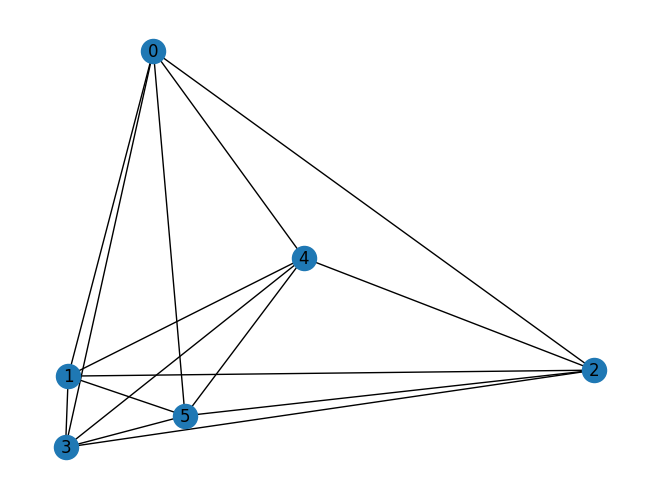

In [56]:
NUM_NODES = 6
MAX_WEIGHT = 20
MIN_WEIGHT = 10

edges = []

for i in range(0, NUM_NODES):
    for j in range(0, NUM_NODES):
        if i != j:
            edges.append((i,j, random.randint(MIN_WEIGHT, MAX_WEIGHT)))

print(edges)
G = nx.Graph()
for start, end, length in edges:
    # You can attach any attributes you want when adding the edge
    G.add_edge(start, end, weight=length)

nx.draw_spectral(G, with_labels=True)
plt.show()

In [63]:
print(nx.adjacency_matrix(G).todense())
print("\n======================\n")
print(nx.adjacency_matrix(G, nodelist=range(NUM_NODES)).toarray())

[[ 0 15 10 13 20 11]
 [15  0 10 19 13 16]
 [10 10  0 10 20 13]
 [13 19 10  0 12 19]
 [20 13 20 12  0 19]
 [11 16 13 19 19  0]]


[[ 0 15 10 13 20 11]
 [15  0 10 19 13 16]
 [10 10  0 10 20 13]
 [13 19 10  0 12 19]
 [20 13 20 12  0 19]
 [11 16 13 19 19  0]]


In [78]:
adjacent_mat = nx.adjacency_matrix(G, nodelist=range(NUM_NODES)).toarray()
q_table = np.zeros((NUM_NODES, NUM_NODES))

def epsilon_greedy(current_state, q_table, epsilon):
    potential_next_state = np.where(np.array(adjacent_mat[current_state]) > 0)[0]
    if random.random() > epsilon:
        q_table_next = q_table[current_state][potential_next_state]
        s_next = potential_next_state[np.argmax(q_table_next)]

In [82]:
np.where(np.array(adjacent_mat[0]) > 0)[0]

array([1, 2, 3, 4, 5], dtype=int64)

In [81]:
adjacent_mat[1][np.where(np.array(adjacent_mat[0]) > 0)[0]]

array([ 0, 10, 19, 13, 16], dtype=int32)

In [67]:
NUM_EPISODES = 500

current_state = 0
for _ in range(1, NUM_EPISODES):
    path = [current_state]
    len_path = 0

    while True:

